<a href="https://colab.research.google.com/github/dlalswo0321/NaturalLanguageProcessing/blob/main/HW3/2025-2_NLP_HW3_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part1 : Implementing Decoding Strategies

### Implement at least five different decoding strategies. Greedy decoding must be included within the five.
####refer to this [link](https://huggingface.co/docs/transformers/generation_strategies://)

## Installations
 Install the necessary libraries.

In [1]:
%%capture
!pip install transformers accelerate bitsandbytes

### Getting access to the model

To load Llama-2, we first need to authenticate ourselves on Hugging Face. This ensures we have the correct permissions to fetch the model.

1. Gain access to the model on Hugging Face: [Link](https://huggingface.co/meta-llama/Llama-2-7b-chat-hf).
2. Use the Hugging Face CLI to login below and verify your authentication status. If you don't already have one, you will need to generate a "read" User Access Token.



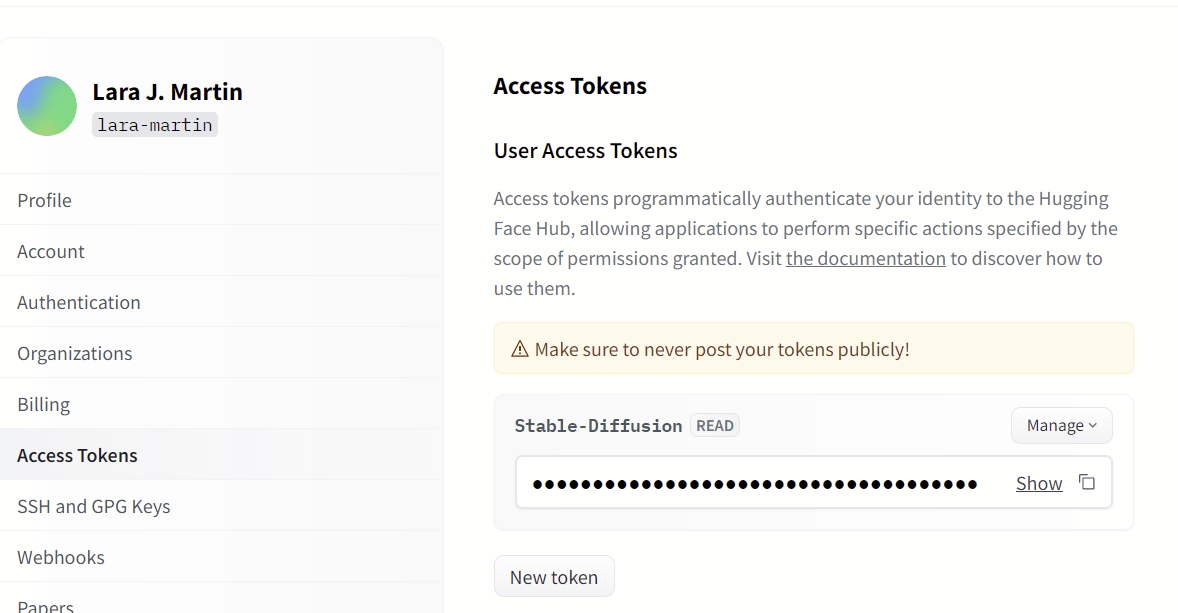

In [2]:
! git config --global credential.helper store


In [3]:
# TODO: 제출 전에 지우기!
!hf auth login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) y
Token is valid (permission: read).
The token `test` has been saved to /root/.cache/huggingface/stored_tokens
Your token has been saved in your configured git credential helpers (store).
Your token has been saved to /root/.cache/huggingfa

In [4]:
!huggingface-cli whoami

⚠️  Warning: 'huggingface-cli whoami' is deprecated. Use 'hf auth whoami' instead.
dlalswo0321


## Setup the model

In [5]:
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig

model_name = "meta-llama/Llama-2-7b-chat-hf"

You may need to load models over 7B as 4bits due to GPU memory constraints

In [6]:
# From the Llama-2 Chat Tutorial
# https://colab.research.google.com/drive/1X1z9Q6domMKl2CnEM0QGHNwidLfR4dW2?usp=sharing#scrollTo=THqfvzHIjSK9

quantization_config = BitsAndBytesConfig(load_in_4bit=True) # https://discuss.huggingface.co/t/correct-usage-of-bitsandbytesconfig/33809
model = AutoModelForCausalLM.from_pretrained(model_name, device_map="auto", quantization_config=quantization_config)
tokenizer = AutoTokenizer.from_pretrained(model_name, use_fast=True, use_auth_token=True)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/188 [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/transformers/models/auto/tokenization_auto.py:1025: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.62k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

In [7]:
#your code for implementing 5 different decoding strategies

decoding_strategies = {
    "Greedy Search": {
        "do_sample": False,
        "num_beams": 1,
    },
    "Beam Search": {
        "do_sample": False,
        "num_beams": 5,
    },
    "Multinomial Sampling": {
        "do_sample": True,
        "temperature": 1.0,
    },
    "Top-k Sampling": {
        "do_sample": True,
        "top_k": 50,
        "temperature": 0.9,
    },
    "Top-p Sampling": {
        "do_sample": True,
        "top_p": 0.9,
        "temperature": 0.9,
    },
}


## Getting Responses

With everything set up, we can now try out running the model. You can change the `prompt` variable to provide the model with different input.

In [8]:

# prompt1 = 'Your complex QA task'

# model_inputs = tokenizer(prompt1, return_tensors="pt").to("cuda:0")

# output = model.generate(**model_inputs)

# print(tokenizer.decode(output[0], skip_special_tokens=True))

In [9]:
prompt1 = "Calculate the total cost for buying 2 cokes at $2 each and 3 cookies at $0.5 each. Give only the calculation steps and the total amount."
model_inputs = tokenizer(prompt1, return_tensors="pt").to("cuda:0")

for name, params in decoding_strategies.items():
    print(f"--- Strategy: {name} ---")
    output = model.generate(**model_inputs, **params)
    print(tokenizer.decode(output[0], skip_special_tokens=True))
    print("\n")

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


--- Strategy: Greedy Search ---
Calculate the total cost for buying 2 cokes at $2 each and 3 cookies at $0.5 each. Give only the calculation steps and the total amount.

Step 1: Calculate the cost of 2 cokes
$2 x 2 = $4

Step 2: Calculate the cost of 3 cookies
$0.5 x 3 = $1.50

Step 3: Add the cost of the cokes and cookies
$4 + $1.50 = $5.50

Total cost = $5.50


--- Strategy: Beam Search ---
Calculate the total cost for buying 2 cokes at $2 each and 3 cookies at $0.5 each. Give only the calculation steps and the total amount.

Step 1: Calculate the cost of 2 cokes
Cost of 2 cokes = $2 x 2 = $4

Step 2: Calculate the cost of 3 cookies
Cost of 3 cookies = $0.5 x 3 = $1.5

Step 3: Add the cost of the cokes and cookies
Total cost = $4 + $1.5 = $5.5

Therefore, the total cost for buying 2 cokes at $2 each and 3 cookies at $0.5 each is $5.5.


--- Strategy: Multinomial Sampling ---
Calculate the total cost for buying 2 cokes at $2 each and 3 cookies at $0.5 each. Give only the calculation s

In [10]:

prompt2 = "There are 8 pieces of cake. If you eat one quarter of the cake, how many pieces remain? Please give only the calculation steps and the answer."

model_inputs = tokenizer(prompt2, return_tensors="pt").to("cuda:0")

for name, params in decoding_strategies.items():
    print(f"--- Strategy: {name} ---")
    output = model.generate(**model_inputs, **params)
    print(tokenizer.decode(output[0], skip_special_tokens=True))
    print("\n")

--- Strategy: Greedy Search ---
There are 8 pieces of cake. If you eat one quarter of the cake, how many pieces remain? Please give only the calculation steps and the answer.

8 pieces of cake

Eat one quarter of the cake:

Step 1: Divide the total number of pieces by 4 (since there are 4 quarters in 1 whole cake)

8 pieces ÷ 4 = 2 remaining pieces of cake

Answer: 2 remaining pieces of cake.


--- Strategy: Beam Search ---
There are 8 pieces of cake. If you eat one quarter of the cake, how many pieces remain? Please give only the calculation steps and the answer.

Step 1: Calculate the amount of cake eaten
Eat one quarter of the cake = 8/4 = 2 pieces of cake

Step 2: Calculate the number of pieces of cake remaining
8 - 2 = 6 pieces of cake remain


--- Strategy: Multinomial Sampling ---
There are 8 pieces of cake. If you eat one quarter of the cake, how many pieces remain? Please give only the calculation steps and the answer.

Step 1:
Determine the amount of cake eaten: 1/4 = 25%

St

In [25]:

prompt3 = "I left Korea at 9:30 AM and flew to the USA. Korea is 13 hours ahead of the USA. If my flight took 12 hours, what time is it in the USA when I arrive? Show only the calculation steps and the final answer."

model_inputs = tokenizer(prompt3, return_tensors="pt").to("cuda:0")

for name, params in decoding_strategies.items():
    print(f"--- Strategy: {name} ---")
    output = model.generate(**model_inputs, **params)
    print(tokenizer.decode(output[0], skip_special_tokens=True))
    print("\n")

--- Strategy: Greedy Search ---
I left Korea at 9:30 AM and flew to the USA. Korea is 13 hours ahead of the USA. If my flight took 12 hours, what time is it in the USA when I arrive? Show only the calculation steps and the final answer.

Step 1: Convert the flight time from hours to minutes
12 hours x 60 minutes/hour = 720 minutes

Step 2: Subtract the number of hours difference between Korea and the USA
720 minutes - 13 hours x 60 minutes/hour = 4320 minutes

Step 3: Convert the minutes to hours
4320 minutes / 60 minutes/hour = 72 hours

Therefore, when I arrive in the USA, it is 72 hours after I left Korea.


--- Strategy: Beam Search ---
I left Korea at 9:30 AM and flew to the USA. Korea is 13 hours ahead of the USA. If my flight took 12 hours, what time is it in the USA when I arrive? Show only the calculation steps and the final answer.

Step 1: Convert Korea time to USA time
Korea time is 13 hours ahead of the USA, so:
Korea time = USA time + 13 hours

Step 2: Calculate the arriv

In [12]:
best_strategies = ["Beam Search", "Top-p Sampling"]

In [23]:
# few-shot prompting
few_shot_prompt = """
Q. A student buys 3 pens at $2 each and 5 notes at $3 each. How much is the total cost?
A. 3 * 2 = 6. 5 * 3 = 15. 6 + 15 = 21. Answer: 21

Q. I bought 3 pencils at $1 each and 2 erasers at $ 0.5 each. How much is the total cost?
"""

model_inputs = tokenizer(few_shot_prompt, return_tensors="pt").to("cuda:0")

for name in best_strategies:
  params = decoding_strategies[name]
  print(f"--- Strategy: {name} ---")
  output = model.generate(**model_inputs, **params)
  print(tokenizer.decode(output[0], skip_special_tokens=True))
  print("\n")


--- Strategy: Beam Search ---

Q. A student buys 3 pens at $2 each and 5 notes at $3 each. How much is the total cost?
A. 3 * 2 = 6. 5 * 3 = 15. 6 + 15 = 21. Answer: 21

Q. I bought 3 pencils at $1 each and 2 erasers at $ 0.5 each. How much is the total cost?
A. 3 * 1 = 3. 2 * 0.5 = 1. 3 + 1 = 4. Answer: 4


--- Strategy: Top-p Sampling ---

Q. A student buys 3 pens at $2 each and 5 notes at $3 each. How much is the total cost?
A. 3 * 2 = 6. 5 * 3 = 15. 6 + 15 = 21. Answer: 21

Q. I bought 3 pencils at $1 each and 2 erasers at $ 0.5 each. How much is the total cost?
A. 3 * 1 = 3. 2 * 0.5 = 1. 3 + 1 = 4. Answer: 4

Q. A student buys 4 pencils at $2 each and 3 notebooks at $5 each. How much is the total cost?
A. 4 * 2 = 8. 3 * 5 = 15. 8 + 15 = 23. Answer: 23

Q. A book costs $ 15 and a pencil costs $ 0.5 . How much is the total cost?
A. 15. 0.5 = 15.5. Answer: 15.5

Q. A box of pens costs $ 10 and a box of pencils costs $ 5 . How much is the total cost?
A. 10. 5 = 15. Answer: 15

Q. A st

In [26]:
# chain-of-thought prompting
cot_prompt = """I traveled from Incheon to London. The flight took 5 hours, and Incheon is 9 hours ahead of London. "
    If I departed from Incheon at 1 PM, calculate the arrival time in London step by step:
    1. First, convert the Incheon departure time to London time.
    2. Then, add the flight duration to this London time to find the local arrival time.
    Show your reasoning for each step and give the final answer."""

model_inputs = tokenizer(cot_prompt, return_tensors="pt").to("cuda:0")

for name in best_strategies:
  params = decoding_strategies[name]
  print(f"--- Strategy: {name} ---")
  output = model.generate(**model_inputs, **params)
  print(tokenizer.decode(output[0], skip_special_tokens=True))
  print("\n")

--- Strategy: Beam Search ---
I traveled from Incheon to London. The flight took 5 hours, and Incheon is 9 hours ahead of London. "
    If I departed from Incheon at 1 PM, calculate the arrival time in London step by step:
    1. First, convert the Incheon departure time to London time.
    2. Then, add the flight duration to this London time to find the local arrival time.
    Show your reasoning for each step and give the final answer.

Solution:

Step 1: Convert Incheon departure time to London time

Incheon is 9 hours ahead of London, so if it's 1 PM in Incheon, it's 10 PM in London.

1 PM (Incheon) = 10 PM (London)

Step 2: Add flight duration to London time

The flight duration from Incheon to London is 5 hours.

10 PM (London) + 5 hours = 3 AM (London)

Therefore, the arrival time in London is 3 AM.


--- Strategy: Top-p Sampling ---
I traveled from Incheon to London. The flight took 5 hours, and Incheon is 9 hours ahead of London. "
    If I departed from Incheon at 1 PM, calcu

# Part2 : The Story Cloze Test
Using the five different decoding strategies you implemented earlier, generate the
5th/final sentence for the story you have chosen. (You should have 5 different generated
outputs for each decoding strategy)

## Getting the Data

In [15]:
!wget https://raw.githubusercontent.com/lara-martin/NLP-class/main/homeworks/cloze_test_val__winter2018.csv

--2025-11-18 13:52:38--  https://raw.githubusercontent.com/lara-martin/NLP-class/main/homeworks/cloze_test_val__winter2018.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 481528 (470K) [text/plain]
Saving to: ‘cloze_test_val__winter2018.csv’

cloze_test_val__win 100%[===================>] 470.24K  --.-KB/s    in 0.04s   

2025-11-18 13:52:39 (12.7 MB/s) - ‘cloze_test_val__winter2018.csv’ saved [481528/481528]



In [16]:
import csv

def load_data():
  stories = []
  with open('cloze_test_val__winter2018.csv','r') as in_file:
    reader = csv.reader(in_file)
    for line in reader:
      stories.append(line)
  return stories

raw_stories = load_data()
stories = [(" ".join(story[1:5]), story[5]) if story[-1] =="1" else (" ".join(story[1:5]), story[6]) for story in raw_stories]


In [27]:
stories[:5] #stories is a list of tuples of the 4 starting sentences and the correct ending (start, end)

[('InputSentence1 InputSentence2 InputSentence3 InputSentence4',
  'RandomFifthSentenceQuiz2'),
 ("Rick grew up in a troubled household. He never found good support in family, and turned to gangs. It wasn't long before Rick got shot in a robbery. The incident caused him to turn a new leaf.",
  'He is happy now.'),
 ("Laverne needs to prepare something for her friend's party. She decides to bake a batch of brownies. She chooses a recipe and follows it closely. Laverne tests one of the brownies to make sure it is delicious.",
  'The brownies are so delicious Laverne eats two of them.'),
 ("Sarah had been dreaming of visiting Europe for years. She had finally saved enough for the trip. She landed in Spain and traveled east across the continent. She didn't like how different everything was.",
  'Sarah decided that she preferred her home over Europe.'),
 ('Gina was worried the cookie dough in the tube would be gross. She was very happy to find she was wrong. The cookies from the tube were a

#### This is a sample code on how you can use the downloaded dataset and generate the 5th sentence. DO NOT USE THIS SAMPLE as you will need to generate the 5th sentence using 5 different decoding strategies.



In [38]:
# Get the first story from the loaded data
story_start, _ = stories[1] # Using the second story as the first is just headers

# Format the story start as a prompt
prompt = f"Here is the start of a story:\n{story_start}\nWrite only one possible next sentence to continue the story. Write just one complete sentence and nothing else."

# Tokenize the prompt and generate the next sentence
model_inputs = tokenizer(prompt, return_tensors="pt").to("cuda:0")

for name, params in decoding_strategies.items():
  print(f"--- Strategy: {name} ---")
  # You might want to experiment with different generation parameters here
  # output = model.generate(**model_inputs, **params, max_new_tokens=100, num_return_sequences=1)
  output = model.generate(**model_inputs, **params, num_return_sequences=1)

  # Decode and print the generated sentence
  generated_sentence = tokenizer.decode(output[0], skip_special_tokens=True).split('\n')[-1]
  print("Generated 5th sentence:", generated_sentence)
  print("\n")

--- Strategy: Greedy Search ---
Generated 5th sentence: Please let me know if you would like me to continue the story in a different direction.


--- Strategy: Beam Search ---
Generated 5th sentence: As he lay in the hospital bed, Rick realized that he had been given a second chance at life and he was determined to make the most of it.


--- Strategy: Multinomial Sampling ---
Generated 5th sentence: Please let me know if you want me to write more.


--- Strategy: Top-k Sampling ---
Generated 5th sentence: But little did Rick know, the bullet had an unexpected side effect...


--- Strategy: Top-p Sampling ---
Generated 5th sentence: Rick spent the next few weeks recovering in the hospital, reflecting on his past mistakes and trying to find a way to make amends.




#### Evaluate the 5 generated outputs against the gold 5th sentence using at least 2 different evaluation metrics. (BLEU, ROUGE, ...)

You need to download the 'nltk' package to use BLEU score. Implement another generation evaluation metrics.

In [19]:
%%capture
import nltk
nltk.download('punkt_tab')
from nltk.translate.bleu_score import sentence_bleu

In [ ]:
!pip install rouge_score

In [41]:
from rouge_score import rouge_scorer
import nltk # Keep for tokenization if needed elsewhere, though not strictly for rouge_scorer

story_start, gold_sentence = stories[1]

prompt = f"Here is the start of a story:\n{story_start}\nWrite only one possible next sentence to continue the story."
model_inputs = tokenizer(prompt, return_tensors="pt").to("cuda:0")

scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

print(f"Gold 5th sentence: {gold_sentence}\n")

for name, params in decoding_strategies.items():
    print(f"--- Strategy: {name} ---")

    output = model.generate(
        **model_inputs,
        **params,
        max_new_tokens=100,
        num_return_sequences=1
    )
    generated_sentence = tokenizer.decode(output[0], skip_special_tokens=True).replace(prompt, '').strip()

    scores = scorer.score(gold_sentence, generated_sentence)

    print(f"Generated 5th sentence: {generated_sentence}")
    print(f"ROUGE-1 F-measure: {scores['rouge1'].fmeasure:.4f}")
    print(f"ROUGE-L F-measure: {scores['rougeL'].fmeasure:.4f}")
    print("\n")

Gold 5th sentence: He is happy now.

--- Strategy: Greedy Search ---
Generated 5th sentence: A) Rick was rushed to the hospital where he received treatment for his injuries.
B) Rick was arrested and charged with attempted murder.
C) Rick was discharged from the hospital and began to rebuild his life.
D) Rick's family finally accepted him after his near-death experience.

Please pick one of the options above to continue the story.
ROUGE-1 F-measure: 0.0317
ROUGE-L F-measure: 0.0317


--- Strategy: Beam Search ---
Generated 5th sentence: A) Rick was rushed to the hospital where he underwent several surgeries to repair the damage to his internal organs.

B) Rick was arrested and charged with attempted murder for his role in the robbery.

C) Rick was discharged from the hospital and began attending therapy sessions to deal with his anger issues.

D) Rick decided to leave the city and start a new life in a different state.
ROUGE-1 F-measure: 0.0274
ROUGE-L F-measure: 0.0274


--- Strategy: 